# Partitioning Schemes

In [1]:
import numpy as np
import pandas as pd
import random, copy
random.seed(0)

from functools import wraps
from time import perf_counter
from typing import Callable, Tuple

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

In [2]:
def get_random_order_list(n):
    l = np.arange(1, n + 1).tolist()
    random.shuffle(l)
    return l

def get_random_order_dictionary(n):
    l = np.arange(1, n + 1).tolist()
    random.shuffle(l)
    
    new_l = {}
    for idx, elem in enumerate(l):
        new_l[idx] = elem
    
    return new_l

In [3]:
get_random_order_dictionary(10)

{0: 8, 1: 9, 2: 2, 3: 6, 4: 4, 5: 5, 6: 3, 7: 1, 8: 10, 9: 7}

In [4]:
def timer(func: Callable) -> Callable:
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = perf_counter()
        results = func(*args, **kwargs)
        end = perf_counter()
        run_time = end - start
        return results, run_time

    return wrapper

In [5]:
def partition_lomuto(sublist, start, end):
    # Take the last element as the pivot element
    pivot = sublist[end]
    
    # Start comparing from the beginning or the start of the list
    begin = start - 1
    
    # Move across the length of the provided sublist
    for current in range(start, end):
        # Whenever the current position element is lesser than pivot, then swap
        # the two elements
        if sublist[current] <= pivot:
            begin += 1
            sublist[current], sublist[begin] = sublist[begin], sublist[current]
    
    # Finally place the pivot in it's correct position
    sublist[end], sublist[begin + 1] = sublist[begin + 1], sublist[end]
    return (begin + 1)

def partition_hoare(sublist, start, end):
 
    pivot = sublist[start]
    i = start - 1
    j = end + 1
     
    
    while True:
        
        # Keep moving right till we find an element less than the pivot
        i += 1
        while (sublist[i] < pivot):
            i += 1
            
        # Keep moving left till we find an element greater than the pivot
        j -= 1
        while (sublist[j] > pivot):
            j -= 1 
            
        # Whenever the right and left pointers cross over, return
        # Right pointer to the calling function
        if i >= j:
            return j
        
        # Otherwise swap the left and right pointer contents
        sublist[i], sublist[j] = sublist[j], sublist[i]
    
    return j

@timer
def quicksort(l, start, end, partition_type = "lomuto"):
    
    # As long as end and start don't cross each other
    if start < end:
        # Perform partitioning and get the index of pivot 
        # which will be placed in final position
        if partition_type == "lomuto":
            part_index = partition_lomuto(l, start, end)
        else:
            part_index = partition_hoare(l, start, end)
        
        # Recursively call quicksort on left and right partitions
        # Pass in which method to use for partition as an argument
        if partition_type == "lomuto":
            quicksort(l, start, part_index - 1, partition_type)
        else:
            quicksort(l, start, part_index, partition_type)
        
        quicksort(l, part_index + 1, end, partition_type)

In [6]:
random.seed(10)
all_records = []

for ip_size in np.arange(1000, 100001, 1000):
    l = get_random_order_list(ip_size)
    original_l = copy.deepcopy(l)
    start, end = 0, len(l) - 1
    _, lomuto_runtime = quicksort(l, start, end)
    _, hoare_runtime = quicksort(original_l, start, end, "hoare")
    
    all_records.append([ip_size, lomuto_runtime, hoare_runtime, "List"])

In [7]:
list_results = pd.DataFrame(all_records, columns = ["InputSize", "Lomuto", "Hoare", "Type"])

In [8]:
random.seed(10)
all_records = []

for ip_size in np.arange(1000, 100001, 1000):
    l = get_random_order_dictionary(ip_size)
    original_l = copy.deepcopy(l)
    start, end = 0, len(l) - 1
    _, lomuto_runtime = quicksort(l, start, end)
    _, hoare_runtime = quicksort(original_l, start, end, "hoare")
    
    all_records.append([ip_size, lomuto_runtime, hoare_runtime, "Dict"])

In [9]:
dict_results = pd.DataFrame(all_records, columns = ["InputSize", "Lomuto", "Hoare", "Type"])

In [11]:
result = pd.concat([list_results, dict_results]).reset_index(drop = True)

In [12]:
result

,InputSize,Lomuto,Hoare,Type
0,1000,0.006919,0.007081,List
1,2000,0.011575,0.008100,List
2,3000,0.007616,0.007008,List
3,4000,0.007824,0.008275,List
4,5000,0.009741,0.010463,List
...,...,...,...,...
195,96000,0.373513,0.341428,Dict
196,97000,0.404374,0.339463,Dict
197,98000,0.399386,0.351538,Dict
198,99000,0.380953,0.353317,Dict


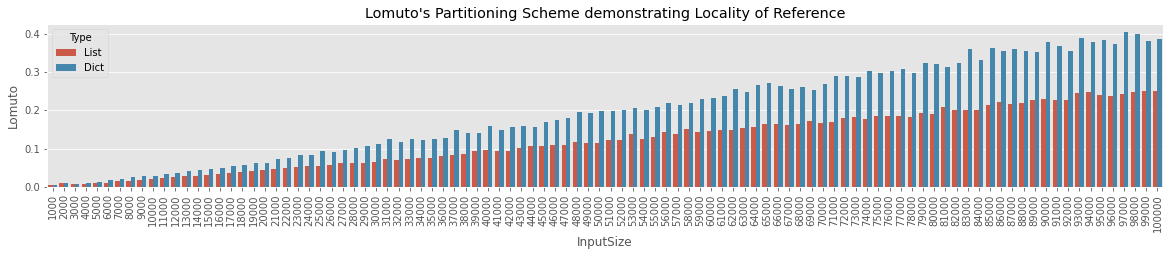

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(x = "InputSize", y = "Lomuto", data = result, hue = "Type", ax = ax)#, cmap = "YlGnBu")
plt.xticks(rotation = 90);
plt.title("Lomuto's Partitioning Scheme demonstrating Locality of Reference");

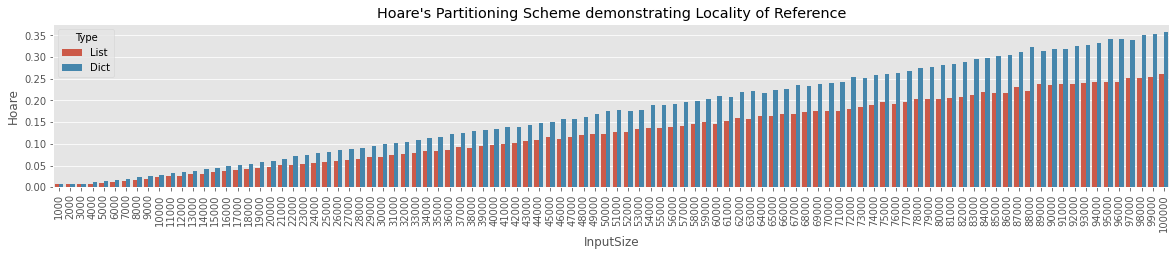

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (20,3))
sns.barplot(x = "InputSize", y = "Hoare", data = result, hue = "Type", ax = ax)#, cmap = "YlGnBu")
plt.xticks(rotation = 90);
plt.title("Hoare's Partitioning Scheme demonstrating Locality of Reference");

# List vs Dict 

`Hoare's Partition` and `Lomuto's Partition` are both methods which are employed in QuickSort algorithm for recursively reducing the problem by partitioning the problem into smaller sub-problems.

In the code above, we are looking at how performance is affected when we use a list vs a dict.

In python, lists are implemented as dynamic arrays of conntiguous memory blocks. Dicts are implemented as hash-tables with contiguous memory. 

> *However, since lists have a lower memory footprint, as we only need to store the values as opposed to dicts where we need to save both keys and values, memory ammortization works better since we still have a fixed size cache so in lists, we're able to save larger number of actual list value blocks as opposed to dictionaries keys and values together. This clearly demonstrates the importance of spatial locality of reference as in the diagrams above, we can find that when we run quicksort on list as opposed to dictionary, we're consistently observing that the list sorting is quicker and more so when the size of list N increases*